# Breakdown of this notebook:
1) **Importing the Libraries**

2) **Loading the dataset**

3) **Understanding the Attrition Problem and the Dataset**

4) **Data Visualization:**   
   - Plot a correlation map for all numeric variables
   - Overtime
   - Marital Status
   - Job Role
   - Gender
   - Education Field
   - Department
   - Buisness Travel
   - Relation between Overtime and Age
   - Total Working Years
   - Education Level
   - Number of Companies Worked
   - Distance from Home

5) **Prediction of Attrition**: LGBM Classifier

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\tejas\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
hr =pd.read_csv("data/hrprediction/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Plot a correlation map for all numeric variables

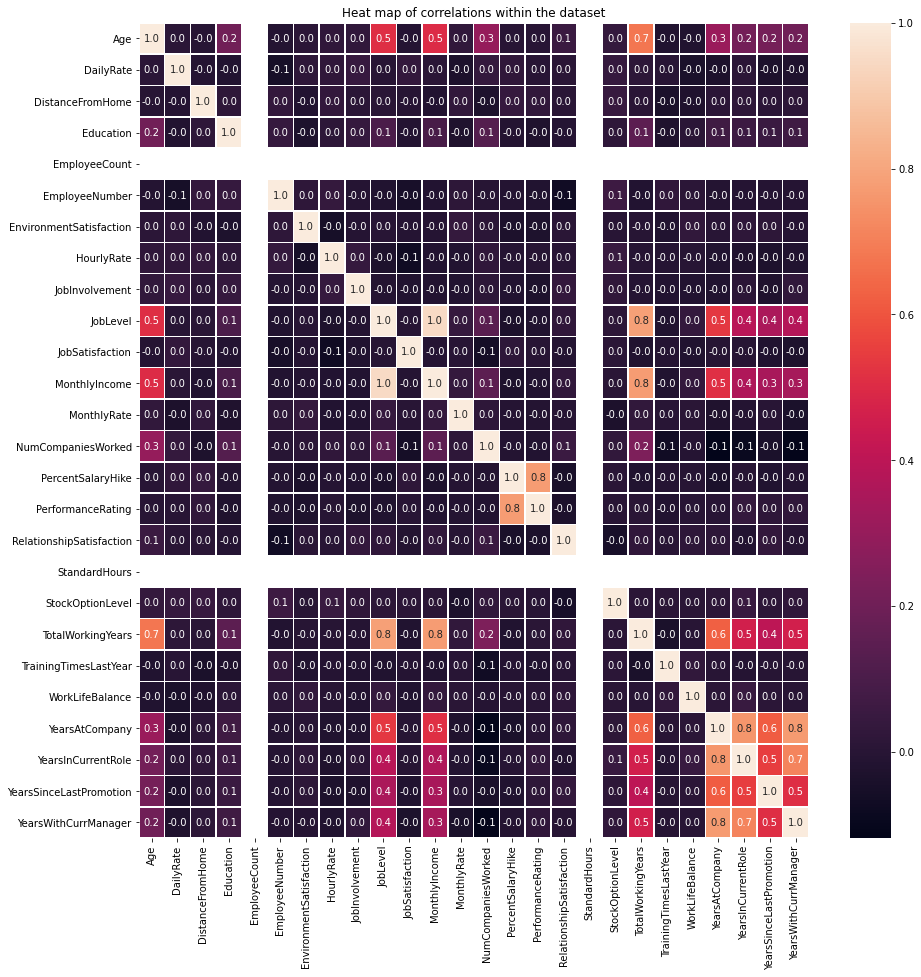

In [5]:
plt.figure(figsize = (15,15))
sns.heatmap(hr.corr(), annot = True, linewidths =  0.5, fmt = '.1f')
plt.title('Heat map of correlations within the dataset')
plt.show()

# Checking the disparity within the dataset
   - Overtime
   - Marital Status
   - Job Role
   

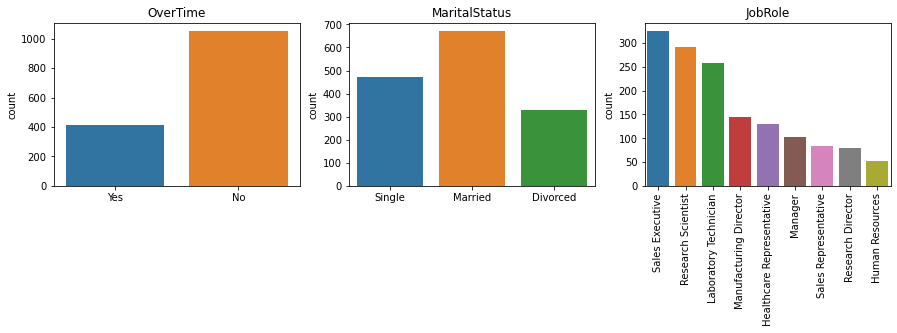

In [6]:
plt.figure(figsize = (15,3))
plt.subplot(1,3,1)
plt.title('OverTime')
sns.countplot('OverTime' ,data = hr)
plt.xlabel("")
plt.subplot(1,3,2)
plt.title('MaritalStatus')
sns.countplot('MaritalStatus' ,data = hr)
plt.xlabel("")
plt.subplot(1,3,3)
plt.title('JobRole')
sns.countplot('JobRole' ,data = hr,)
plt.xticks(rotation = 90)
plt.xlabel("")
plt.show()

   - Gender
   - Education Field
   - Department
   - Buisness Travel

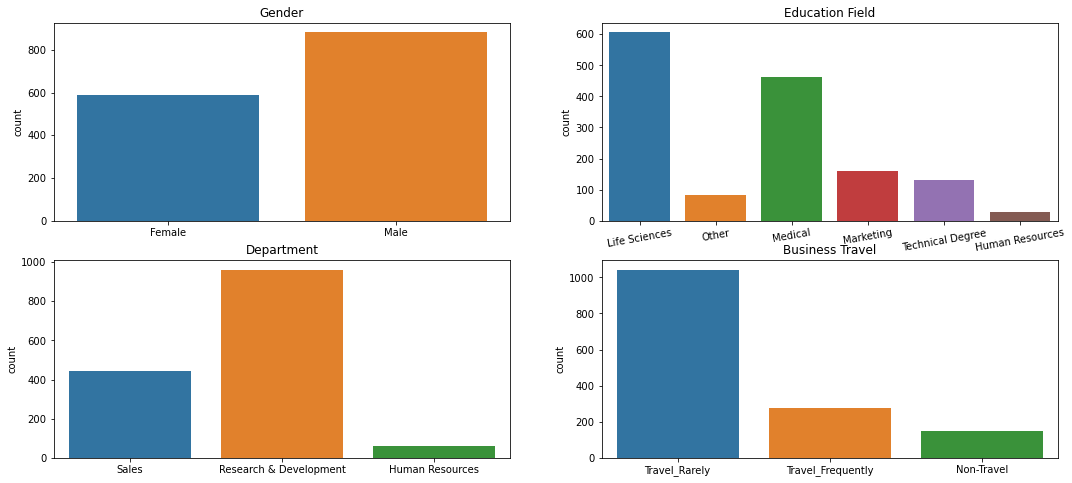

In [7]:
plt.figure(figsize = (18,8))
plt.subplot(2,2,1)
plt.title('Gender')
sns.countplot('Gender' ,data = hr)
plt.xlabel("")
plt.subplot(2,2,2)
plt.title('Education Field')
sns.countplot('EducationField' ,data = hr)
plt.xlabel("")
plt.xticks(rotation = 10)
plt.subplot(2,2,3)
plt.title('Department')
sns.countplot('Department' ,data = hr)
plt.xlabel("")
plt.subplot(2,2,4)
plt.title('Business Travel')
sns.countplot('BusinessTravel' ,data = hr)
plt.xlabel("")
plt.show()

# Relation between Overtime and Age

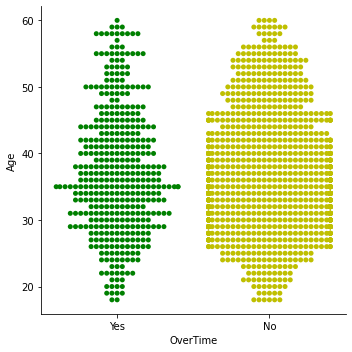

In [8]:
sns.catplot(x = 'OverTime', y = 'Age', kind = 'swarm',data = hr,palette = ['g','y'])

# Total Working Years

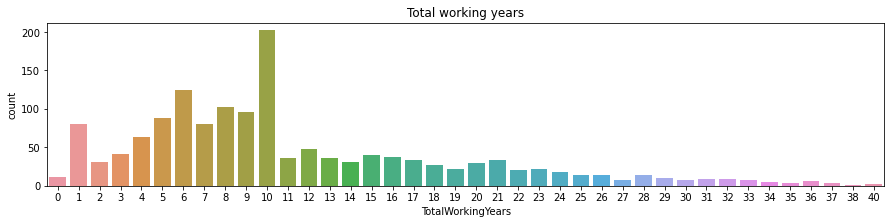

In [9]:
plt.figure(figsize = (15,3))
plt.title('Total working years')
sns.countplot('TotalWorkingYears', data = hr)

# Education Level

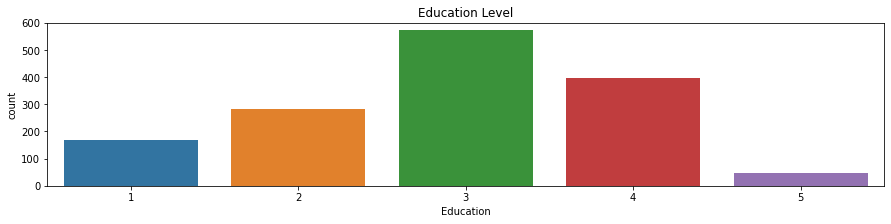

In [10]:
plt.figure(figsize = (15,3))
plt.title('Education Level')
sns.countplot('Education', data = hr)

In [11]:
hr.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Number of Companies Worked

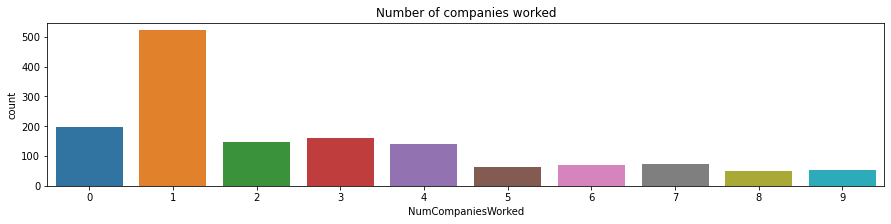

In [12]:
plt.figure(figsize = (15,3))
plt.title('Number of companies worked')
sns.countplot('NumCompaniesWorked', data = hr)
plt.show()

# Distance from Home

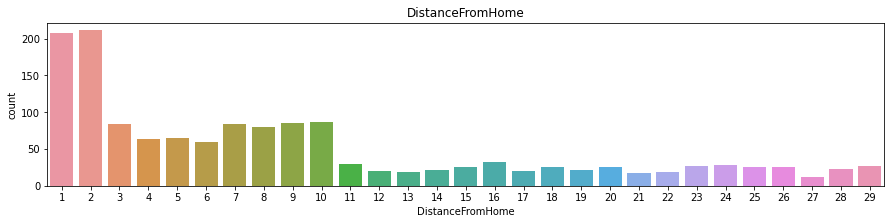

In [13]:
plt.figure(figsize = (15,3))
plt.title('DistanceFromHome')
sns.countplot('DistanceFromHome', data = hr)
plt.show()

In [14]:
hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [15]:
l = []
for i in range(len(hr.dtypes)):
    if hr.dtypes[i] == 'object':
        l.append(hr.columns[i])
d = hr[l].copy()


In [16]:
d.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [17]:
z = pd.get_dummies(d,drop_first = True)

In [18]:
hr = pd.concat([hr,z],axis = 1)
hr = hr.drop(d.columns,axis = 1)

In [19]:
hr.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,1,2,3,61,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,1,0,0,0,0,0,0,1,0,0
